In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pathlib as pl
import os 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Breast Cancer Screening Classification 

The dataset you will be working with comes from The Breast Cancer Surveillance Consortium, an American organisation that does research into Breast Cancer. To download a fresh copy of the dataset, go to https://www.bcsc-research.org/data/rfdataset, and for information on each of variables in the dataset, see https://www.bcsc-research.org/data/mammography_dataset/dataset_documentation.

In this notebook you will be looking at the effectiveness of mammogram breast cancer screening for women aged 60-83. For more information on breast cancer screening see https://www.cancerresearchuk.org/about-cancer/breast-cancer/getting-diagnosed/screening/breast-screening

In this notebook you will create confusion matrices and calculate the specificity and sensitivity of both the whole data and each age group within the datasets. 

### First load the dataset

In [2]:
path_csv = pl.Path(os.getcwd()) / f'm6-dataset.csv'
with open(path_csv, 'rb') as file:
    data_pd = pd.read_csv(file)

In [3]:
print(data_pd.head())
print(type(data_pd))

   age_c  assess_c  cancer_c  compfilm_c  density_c  famhx_c  hrt_c  prvmam_c  \
0     62         1         0           1          2        0      0         1   
1     65         1         0           1          4        0      0         1   
2     69         0         0           1          2        0      0         1   
3     64         2         0           1          2        0      0         1   
4     63         3         0           1          2        0      0         1   

   biophx_c  mammtype  CaTypeO      bmi_c  ptid  
0         0         1        8  24.023544     1  
1         0         1        8 -99.000000     2  
2         0         1        8  29.052429     3  
3         0         1        8 -99.000000     4  
4         1         1        8  33.729523     5  
<class 'pandas.core.frame.DataFrame'>


## Section 1: Confusion Matrix 

### TODO: Write code to create a confusion matrix for the dataset

For this dataset, we are comparing the radiologist's assessment to the true cancer state of the patient. 

Values of  1, 2 or 3 in the assess_c column are counted as being predictions of no cancer, while predictions of 0, 4 or 5 are counted as being predictions of cancer. 

Use the 'cancer_c' column as the true indicator of if the patient has cancer, with 0 indicating no cancer and 1 indicating cancer. 

Use these values to calculate the number of true positives, false negatives, true negatives and false positives and plot a confusion matrix. 

HINT: you can use seaborn heatmaps to plot your confusion matrix. If you convert your confusion matrix into a dataframe first with correctly labelled columns and indexes, you can get the correct labels on your heatmap. 

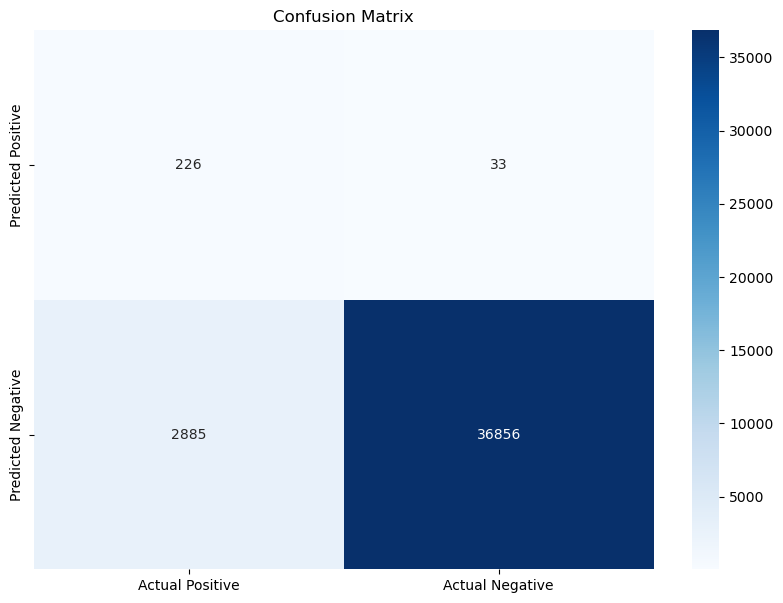

In [4]:
# type your answer here
# Calculate true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
TP = sum((data_pd['assess_c'].isin([0, 4, 5])) & (data_pd['cancer_c'] == 1))
FN = sum((data_pd['assess_c'].isin([1, 2, 3])) & (data_pd['cancer_c'] == 1))
TN = sum((data_pd['assess_c'].isin([1, 2, 3])) & (data_pd['cancer_c'] == 0))
FP = sum((data_pd['assess_c'].isin([0, 4, 5])) & (data_pd['cancer_c'] == 0))

# Create confusion matrix
confusion_matrix = pd.DataFrame({
    'Actual Positive': [TP, FP],
    'Actual Negative': [FN, TN]
}, index=['Predicted Positive', 'Predicted Negative'])

# Plot using seaborn heatmap
plt.figure(figsize=(10, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Section 2: Calculate the Sensitivity and Specificity 

### TODO: Write a function to calculate the sensitivity and specificity of the breast cancer screening 

Calculate the sensitivity and specificity of the breast cancer screening and answer the first questions that go alongside this notebook. 

In [12]:
# type your answer here

def calculate_sensitivity_specificity(TP, FN, TN, FP):
    """
    Calculate sensitivity and specificity.
    
    Parameters:
    - TP: True Positives
    - FN: False Negatives
    - TN: True Negatives
    - FP: False Positives
    
    Returns:
    - sensitivity, specificity
    """
    try:
        sensitivity = TP / (TP + FN)
    except ZeroDivisionError:
        sensitivity = 0
    
    try:
        specificity = TN / (TN + FP)
    except ZeroDivisionError:
        specificity = 0

    return sensitivity, specificity

# Using previously calculated TP, FN, TN, and FP
sensitivity, specificity = calculate_sensitivity_specificity(TP, FN, TN, FP)
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.87
Specificity: 0.93


## Section 3: Comparing the different Age Groups

### TODO: For each age group ( 60-69, 70-79 and 80-89) plot a confusion matrix and calculate the specificty and sensitivity 

In [14]:
# type your answer here

def compute_confusion_matrix_values(df):
    """
    Compute confusion matrix values for a dataframe based on given criteria.
    
    Returns:
    TP, FN, TN, FP
    """
    # Predictions for cancer
    cancer_predictions = df['assess_c'].isin([0, 4, 5])
    true_cancer = df['cancer_c'] == 1

    TP = sum(cancer_predictions & true_cancer)
    FN = sum(~cancer_predictions & true_cancer)
    TN = sum(~cancer_predictions & ~true_cancer)
    FP = sum(cancer_predictions & ~true_cancer)
    
    return TP, FN, TN, FP

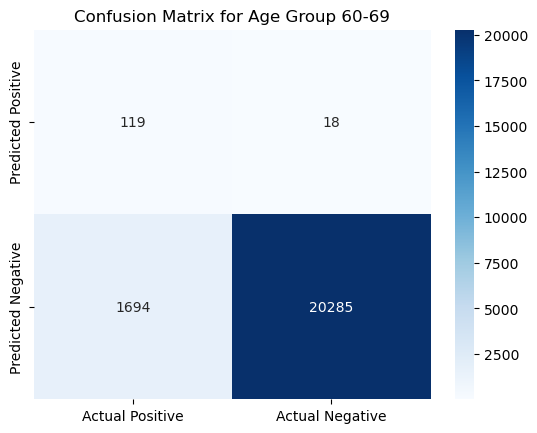

Age Group 60-69:
Sensitivity: 0.87
Specificity: 0.92
------------------------------


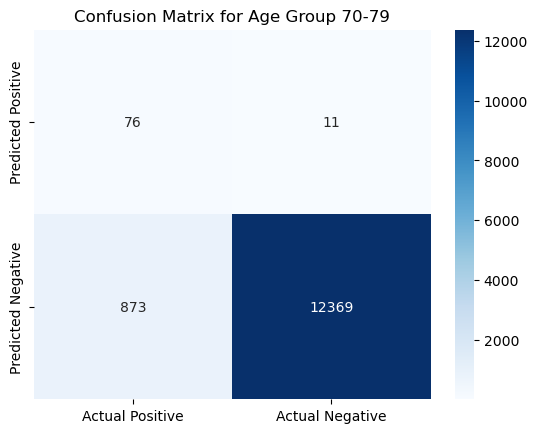

Age Group 70-79:
Sensitivity: 0.87
Specificity: 0.93
------------------------------


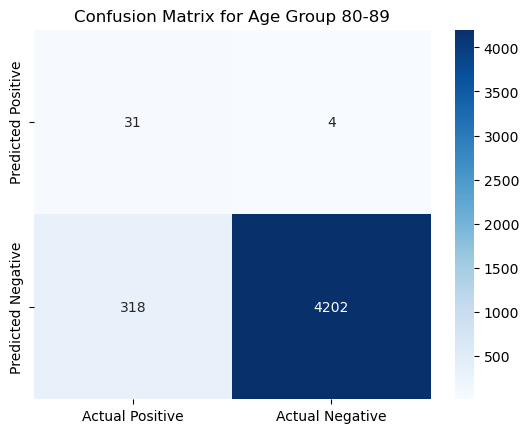

Age Group 80-89:
Sensitivity: 0.89
Specificity: 0.93
------------------------------


In [16]:

# Read dataset, data_pd

# Split data into age groups
age_groups = {
    '60-69': (60, 69),
    '70-79': (70, 79),
    '80-89': (80, 89)
}

for group, (min_age, max_age) in age_groups.items():
    #creating subset based on the age group
    subset_df = data_pd[data_pd['age_c'].between(min_age, max_age)]
    
    TP, FN, TN, FP = compute_confusion_matrix_values(subset_df)
    confusion_df = pd.DataFrame({
        'Actual Positive': [TP, FP],
        'Actual Negative': [FN, TN]
    }, index=['Predicted Positive', 'Predicted Negative'])
    
    # Plot confusion matrix
    plt.figure()
    sn.heatmap(confusion_df, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for Age Group {group}')
    plt.show()

    # Calculate sensitivity and specificity
    sensitivity, specificity = calculate_sensitivity_specificity(TP, FN, TN, FP)
    print(f"Age Group {group}:")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print("-" * 30)